In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy.linalg import svd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [2]:
data=pd.read_csv(os.path.join(os.getcwd(),'train.csv'))

## Просмотр датасета

In [3]:
data.head(100)

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
0,mlm,b28abb42,2020-06-12T14:26:12,Victor,объяснения предсказаний с помощью lime,4
1,mlm,438b5c4d,2020-06-12T11:53:10,Victor,Поставил lime вместо eli5,3
2,mlm,8e6e4f31,2020-06-11T15:19:03,Victor,Скрипт для создния пакетов обновления,4
3,mlm,5e0956a6,2020-06-11T10:42:29,Victor,Сортировка весов по убыванию,3
4,mlm,b9f4b40c,2020-06-11T09:25:19,Victor,не надо конвертировать массив до операции по с...,7
...,...,...,...,...,...,...
95,conductor,ae0c434a,2020-05-21T13:30:16,Wendy,Update src/express.py,1
96,conductor,75c7c968,2020-05-14T15:05:18,Victor,Поменял название полей для создания туней в со...,9
97,conductor,ae592bde,2020-05-14T13:59:17,Victor,Удаление всех образов по имени,4
98,conductor,750982bd,2020-05-13T12:57:54,Victor,Не создавать директорию если в конце есть точк...,8


In [4]:
data.describe()

,bugs
count,319.000000
mean,2.996865
std,1.855636
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,12.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repository_name  319 non-null    object
 1   commit_hash      319 non-null    object
 2   commit_date      319 non-null    object
 3   commit_author    319 non-null    object
 4   commit_message   319 non-null    object
 5   bugs             319 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 15.1+ KB


In [6]:
data.drop(['commit_hash'],axis=1,inplace=True)

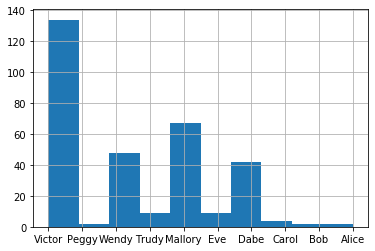

In [7]:
data['commit_author'].hist()

In [8]:
data['commit_author'].value_counts()

Victor     134
Mallory     67
Wendy       48
Dabe        42
Trudy        9
Eve          9
Carol        4
Bob          2
Alice        2
Peggy        2
Name: commit_author, dtype: int64

In [9]:
data.groupby('commit_author')['bugs'].agg(sum)

commit_author
Alice        1
Bob          5
Carol        6
Dabe       101
Eve         32
Mallory    213
Peggy        7
Trudy       19
Victor     464
Wendy      108
Name: bugs, dtype: int64

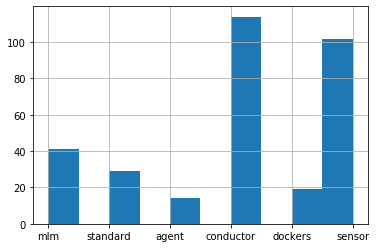

In [10]:
data['repository_name'].hist()


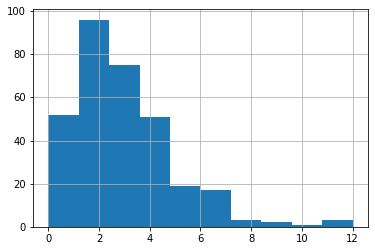

In [11]:
data['bugs'].hist()

# добавление признака на основании даннных датасета

In [12]:
mean_bugs=data.groupby(['commit_author','repository_name'],as_index=False)[['bugs']].mean().rename(columns={'bugs': 'mean_bugs'})
data = pd.merge(data, mean_bugs, on=['commit_author','repository_name'], how='left')
data

,repository_name,commit_date,commit_author,commit_message,bugs,mean_bugs
0,mlm,2020-06-12T14:26:12,Victor,объяснения предсказаний с помощью lime,4,5.102564
1,mlm,2020-06-12T11:53:10,Victor,Поставил lime вместо eli5,3,5.102564
2,mlm,2020-06-11T15:19:03,Victor,Скрипт для создния пакетов обновления,4,5.102564
3,mlm,2020-06-11T10:42:29,Victor,Сортировка весов по убыванию,3,5.102564
4,mlm,2020-06-11T09:25:19,Victor,не надо конвертировать массив до операции по с...,7,5.102564
...,...,...,...,...,...,...
314,sensor,2020-03-23T12:54:35,Dabe,setting hostname,1,1.428571
315,sensor,2020-03-23T12:30:52,Dabe,heralding default dockerfile,2,1.428571
316,sensor,2020-03-23T11:27:40,Dabe,unnesserity /data path permissions setting,3,1.428571
317,sensor,2020-03-23T11:20:50,Dabe,added trapconductor,1,1.428571


In [13]:
data['commit_len']=data['commit_message'].map(lambda x:len(x.split(' ')))


<blockquote>Из даты выделим день и месяц</blockquote>

In [14]:
data['commit_date']=pd.to_datetime( data['commit_date'])
data['day']=data['commit_date'].apply(lambda x:x.day)
data['month']=data['commit_date'].apply(lambda x:x.month)
data.drop(columns=['commit_date'],inplace=True)
data


,repository_name,commit_author,commit_message,bugs,mean_bugs,commit_len,day,month
0,mlm,Victor,объяснения предсказаний с помощью lime,4,5.102564,5,12,6
1,mlm,Victor,Поставил lime вместо eli5,3,5.102564,4,12,6
2,mlm,Victor,Скрипт для создния пакетов обновления,4,5.102564,5,11,6
3,mlm,Victor,Сортировка весов по убыванию,3,5.102564,4,11,6
4,mlm,Victor,не надо конвертировать массив до операции по с...,7,5.102564,9,11,6
...,...,...,...,...,...,...,...,...
314,sensor,Dabe,setting hostname,1,1.428571,2,23,3
315,sensor,Dabe,heralding default dockerfile,2,1.428571,3,23,3
316,sensor,Dabe,unnesserity /data path permissions setting,3,1.428571,5,23,3
317,sensor,Dabe,added trapconductor,1,1.428571,2,23,3


In [15]:
data.loc[data['bugs']>5,:]

,repository_name,commit_author,commit_message,bugs,mean_bugs,commit_len,day,month
4,mlm,Victor,не надо конвертировать массив до операции по с...,7,5.102564,9,11,6
5,mlm,Peggy,Добавлено больше логирования и фикс до частичн...,6,3.500000,8,11,6
12,mlm,Victor,"Не сохранять неизвестные поля, на них нельзя о...",11,5.102564,14,10,6
13,mlm,Victor,"hdf5 не умеет хранить матрицы различных типов,...",10,5.102564,13,10,6
15,mlm,Victor,тип и всякие статичные данные пусть лежат в да...,7,5.102564,9,10,6
19,mlm,Victor,"Пересмотрели архитектуру, теперь все запросы ч...",6,5.102564,7,5,6
28,mlm,Victor,no feature names in queue calls,8,5.102564,6,21,3
30,mlm,Victor,Default rabbitMQ NETWORK ip,6,5.102564,4,9,3
31,mlm,Victor,Docker COPY cannot in directories,7,5.102564,5,9,3
32,mlm,Victor,Removed default freeze package,6,5.102564,4,9,3


In [16]:
data

,repository_name,commit_author,commit_message,bugs,mean_bugs,commit_len,day,month
0,mlm,Victor,объяснения предсказаний с помощью lime,4,5.102564,5,12,6
1,mlm,Victor,Поставил lime вместо eli5,3,5.102564,4,12,6
2,mlm,Victor,Скрипт для создния пакетов обновления,4,5.102564,5,11,6
3,mlm,Victor,Сортировка весов по убыванию,3,5.102564,4,11,6
4,mlm,Victor,не надо конвертировать массив до операции по с...,7,5.102564,9,11,6
...,...,...,...,...,...,...,...,...
314,sensor,Dabe,setting hostname,1,1.428571,2,23,3
315,sensor,Dabe,heralding default dockerfile,2,1.428571,3,23,3
316,sensor,Dabe,unnesserity /data path permissions setting,3,1.428571,5,23,3
317,sensor,Dabe,added trapconductor,1,1.428571,2,23,3



<blockquote>В датасете много категориальных признаков,которые нужно обработать, добавим функцию для создания нового признака</blockquote>

In [17]:
# функция возвращает значения нового признака
def code_factor(data, cat_feature,cat_feature2):
    ct = pd.crosstab(data[cat_feature], data[cat_feature2])
    u, _, _ = svd(ct.values)
    coder = dict(zip(ct.index, u[:,0])) # если кодировать первой компонентой
    return data[cat_feature].map(coder)
    


In [18]:
X_train, X_test, y_train, y_test=train_test_split(data.loc[:,'commit_message'],data['bugs'], test_size=0.25, random_state=42)

## пробная модель

<blockquote>Попробуем в лоб решить задачу, зависимость комментария от числа багов, используя следующие методы</blockquote>

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
vect.fit(X_train)
vect.vocabulary_
bag_of_words=vect.transform(X_train)
scores=cross_val_score(LogisticRegression(),bag_of_words,y_train,cv=5)
np.mean(scores)

C:\Users\1\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.32225177304964536

## жадное решение

<blockquote>Решение в лоб не увенчалось успехом.Попробуем следующее:1) Будем предсказывать классы ошибок, вместо самого значения (упростим задачу),2) побробуем 2 разные модели:1) модель на основе текста (1 главный признак), 2) модель  на основе остальных признаков. 
</blockquote>

In [20]:
def train_test_split_for_text():
       return train_test_split(data.loc[:,'commit_message'],data['bugs_claster'], test_size=0.25, random_state=42)

def train_test_split_for_data():
       return train_test_split(temp_data[feats],temp_data['bugs_claster'], test_size=0.25, random_state=42)


In [21]:
claster={'Мало ошибок':[0,1],'Cреднее':[2,3,4],'Много':[5,6,7,8,9,10,11,12]}
n_claster={k[0]:k[1] for k in zip(claster.keys(),[0,1,2])}

def to_claster(item):
    for key in claster:
        if item in claster[key]:
            return n_claster[key]


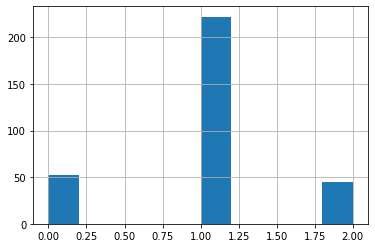

In [22]:
data['bugs_claster']=data['bugs'].apply(to_claster)
data['bugs_claster'].hist()

In [23]:
data['bugs_claster'].describe()

count    319.000000
mean       0.978056
std        0.551859
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: bugs_claster, dtype: float64

In [24]:
temp_data=data.copy()
dummy=pd.get_dummies( temp_data[['repository_name','commit_author']])
temp_data= pd.merge(temp_data,dummy,on=data.index,how='inner').drop(columns=['key_0'])
temp_data.drop(columns=['repository_name','commit_author'],inplace=True)

In [25]:
feats=[x for x in temp_data.columns if x!='bugs' and x!='commit_message' and x!='bugs_claster']
feats


['mean_bugs',
 'commit_len',
 'day',
 'month',
 'repository_name_agent',
 'repository_name_conductor',
 'repository_name_dockers',
 'repository_name_mlm',
 'repository_name_sensor',
 'repository_name_standard',
 'commit_author_Alice',
 'commit_author_Bob',
 'commit_author_Carol',
 'commit_author_Dabe',
 'commit_author_Eve',
 'commit_author_Mallory',
 'commit_author_Peggy',
 'commit_author_Trudy',
 'commit_author_Victor',
 'commit_author_Wendy']

In [26]:
X_train_for_text, X_test_for_text, y_train_for_text, y_test_for_text=train_test_split_for_text()

In [27]:
vect=CountVectorizer().fit(X_train_for_text)

X_train=vect.transform(X_train_for_text)


In [28]:
X_train

<239x569 sparse matrix of type '<class 'numpy.int64'>'
	with 989 stored elements in Compressed Sparse Row format>

In [29]:
scores=cross_val_score(LogisticRegression(),X_train,y_train_for_text,cv=5)

In [30]:
np.mean(scores)


0.6986702127659575

<blockquote>Стало на много лучше, хотя и не так точно!
</blockquote>

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train_for_text)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))
print("Наилучшие параметры: ", grid.best_params_)


Наилучшее значение перекрестной проверки: 0.70
Наилучшие параметры:  {'C': 1}


In [32]:
X_test = vect.transform(X_test_for_text)
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(X_test, y_test_for_text)))

Правильность на тестовом наборе: 0.70


In [33]:
def f1_score_(true,pred):
        return f1_score(true,pred,average='weighted')

In [34]:
f1_score_(y_test_for_text,grid.predict(X_test))


0.6147921108742004

In [35]:
y_test_for_text.values

array([1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2,
       1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0], dtype=int64)

In [36]:
grid.predict(X_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
 LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train_for_text, y_train_for_text)
print("Наилучшее значение перекр проверки: {:.2f}".format(grid.best_score_))

Наилучшее значение перекр проверки: 0.70


In [38]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# преобразуем обучающий набор данных
X_train = vectorizer.transform(X_train_for_text)
# находим максимальное значение каждого признака по набору данных
360
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# получаем имена признаков
feature_names = np.array(vectorizer.get_feature_names())

print("Признаки с наименьшими значениями tfidf:\n{}".format(
 feature_names[sorted_by_tfidf[:20]]))
print("Признаки с наибольшими значениями tfidf: \n{}".format(
 feature_names[sorted_by_tfidf[-20:]]))

Признаки с наименьшими значениями tfidf:
['added' 'fix' 'add' 'для' 'на' 'не' 'config' 'trap' 'in' 'docker'
 'добавил' 'compose' 'suricata' 'into' 'py' 'branch' 'sh' 'install'
 'images' 'fixes']
Признаки с наибольшими значениями tfidf: 
['in' 'docker' 'добавил' 'compose' 'suricata' 'into' 'py' 'branch' 'sh'
 'install' 'images' 'fixes' 'filebeat' 'to' 'update' 'service' 'log'
 'file' 'dns' 'json']


In [39]:
grid.best_params_

{'logisticregression__C': 0.1}

In [40]:
pipe = make_pipeline(TfidfVectorizer(min_df=3), LogisticRegression())
# выполнение решетчатого поиска займет много времени из-за
# относительно большой сетки параметров и включения триграмм
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
 "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train_for_text, y_train_for_text)
print("Наилучшее значение перекр проверки: {:.2f}".format(grid.best_score_))
print("Наилучшие параметры:\n{}".format(grid.best_params_))


C:\Users\1\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\1\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

Наилучшее значение перекр проверки: 0.70
Наилучшие параметры:
{'logisticregression__C': 1, 'tfidfvectorizer__ngram_range': (1, 2)}


C:\Users\1\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\1\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

In [41]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# преобразуем обучающий набор данных
X_train = vectorizer.transform(X_train_for_text)
# находим максимальное значение каждого признака по набору данных
360
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# получаем имена признаков
feature_names = np.array(vectorizer.get_feature_names())

print("Признаки с наименьшими значениями tfidf:\n{}".format(
 feature_names[sorted_by_tfidf[:20]]))
print("Признаки с наибольшими значениями tfidf: \n{}".format(
 feature_names[sorted_by_tfidf[-20:]]))

Признаки с наименьшими значениями tfidf:
['to merge' 'merge into' 'changes to' 'branch changes' 'into master'
 'make' 'fixes in' 'work' 'it' 'to make' 'make it' 'small fixes' 'small'
 'log path' 'path' 'branch' 'dns trap' 'dns' 'master' 'merge branch']
Признаки с наибольшими значениями tfidf: 
['changed' 'changes' 'check' 'commit' 'default' 'delete' 'error' 'trap'
 'file' 'fix' 'fixes' 'in' 'json' 'файл' 'memory' 'py' 'service'
 'suricata' 'filebeat' 'через']


<blockquote>Признаки которымм руководствуется модель при построении
</blockquote>

In [42]:
model=LogisticRegression(C=1).fit(X_train,y_train_for_text)
model.score(vectorizer.transform(X_test_for_text),y_test_for_text)

0.7

In [43]:
f1_score_(model.predict(vectorizer.transform(X_test_for_text)),y_test_for_text)

0.8029411764705883

In [44]:
new_data_for_train=model.predict(X_train)
new_data_for_test=model.predict(vectorizer.transform(X_test_for_text))

In [45]:
model.predict(vectorizer.transform(X_test_for_text))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
y_test_for_text.values

array([1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2,
       1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0], dtype=int64)

In [47]:
X_train_for_data, X_test_for_data, y_train_for_data, y_test_for_data=train_test_split_for_data()


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def RFC_(X_train_for_data, X_test_for_data, y_train_for_data, y_test_for_data):
    parameters = [{'n_estimators': [10,50,100,150],
               'max_features': np.arange(5, 9),
               'max_depth': np.arange(5, 10)}]

    clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100), 
                   param_grid=parameters,
                   scoring='accuracy',
                   cv=5)
    clf.fit(X_train_for_data, y_train_for_data)
    print(clf,'\n\n')
    print(clf.best_params_,'\n\n')
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
    y_pred = clf.predict(X_test_for_data)
    print(f"\n\nf1_score {f1_score_(y_test_for_data, y_pred)}")
    

## Использование не текстовых признаков с кросс-валидацией

In [49]:
RFC_(X_train_for_data, X_test_for_data, y_train_for_data, y_test_for_data)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [50]:
model=RandomForestClassifier(max_depth=5,max_features=6, n_estimators=10).fit(X_train_for_data,y_train_for_data)

In [51]:
f_i=pd.DataFrame(model.feature_importances_,index=X_train_for_data.columns,columns=['value'])

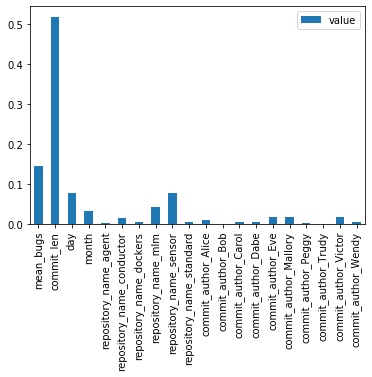

In [52]:
f_i.plot(kind='bar')

<blockquote>Наиболее значимые признаки, 
</blockquote>

In [53]:
f1_score_(y_test_for_data,model.predict(X_test_for_data))

0.8627820512820511

<blockquote>Добавим, предсказанные текстовой моделью данные, как признак.
</blockquote>

In [54]:
def new_feature(frame,pred):
    temp_table=pd.DataFrame(data.loc[frame.index,'commit_author'])
    temp_table['new_feat']=pred
    return temp_table['new_feat']
#
    

In [55]:
X_train_for_data['new_feat']=new_feature(X_train_for_data,new_data_for_train)
X_test_for_data['new_feat']=new_feature(X_test_for_data,new_data_for_test)

In [56]:
RFC_(X_train_for_data, X_test_for_data, y_train_for_data, y_test_for_data)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [57]:
model=RandomForestClassifier(max_depth=6, n_estimators=150).fit(X_train_for_data,y_train_for_data)


In [58]:
f_i=pd.DataFrame(model.feature_importances_,index=X_train_for_data.columns,columns=['value'])

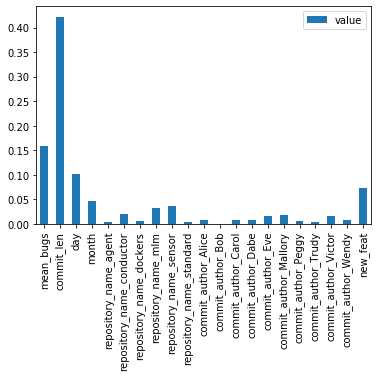

In [59]:
f_i.plot(kind='bar')

In [60]:
f1_score_(y_test_for_data,model.predict(X_test_for_data))

0.8279328072692491

<blockquote>попробуем промасшатабировать признаки
</blockquote>

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_for_data)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_for_data.columns)

X_test_scaled = scaler.transform(X_test_for_data)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_for_data.columns)

In [62]:
RFC_(X_train_scaled, X_test_scaled, y_train_for_data, y_test_for_data)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [63]:
model=RandomForestClassifier(max_depth=6,max_features=6, n_estimators=150).fit(X_train_scaled,y_train_for_data)

In [64]:
f_i=pd.DataFrame(model.feature_importances_,index=X_train_for_data.columns,columns=['value'])

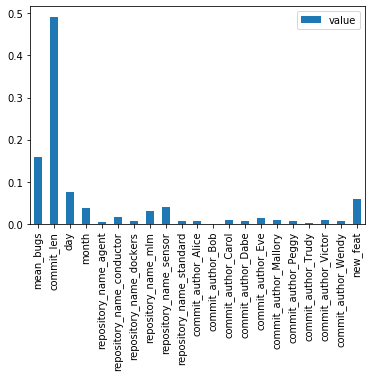

In [65]:
f_i.plot(kind='bar')

In [66]:
f1_score_(y_test_for_data,model.predict(X_test_scaled))

0.8881452429149798

<blockquote>Попробуем ввести еще один признак
</blockquote>

In [67]:
temp_table=pd.DataFrame(data.loc[X_train_for_data.index,'commit_author'])
temp_table['new_feat_for_train']=new_data_for_train
temp_table['new_feat_for_train']=code_factor(temp_table,'commit_author','new_feat_for_train')
X_train_for_data['new_feat_2']=temp_table['new_feat_for_train']
temp_table=pd.DataFrame(data.loc[X_test_for_data.index,'commit_author'])
temp_table['new_feat_for_test']=new_data_for_test
temp_table['new_feat_for_test']=code_factor(temp_table,'commit_author','new_feat_for_test')
X_test_for_data['new_feat_2']=temp_table['new_feat_for_test']


In [68]:
RFC_(X_train_for_data, X_test_for_data, y_train_for_data, y_test_for_data)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [69]:
model=RandomForestClassifier(max_depth=6,n_estimators=100).fit(X_train_for_data,y_train_for_data)

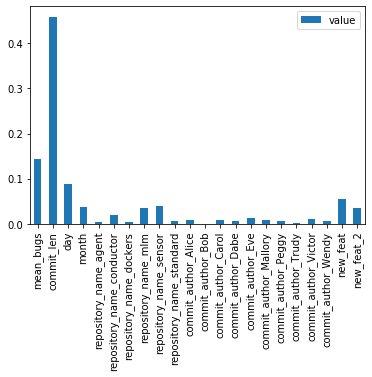

In [70]:
f_i=pd.DataFrame(model.feature_importances_,index=X_train_for_data.columns,columns=['value'])
f_i.plot(kind='bar')

In [71]:
f1_score_(y_test_for_data,model.predict(X_test_for_data))

0.8573803827751195

<blockquote>Попробуем предсказать непрерывную величину.
</blockquote>

In [72]:
y_train_for_data, y_test_for_data=train_test_split(temp_data['bugs'], test_size=0.25, random_state=42)

In [73]:
from sklearn.ensemble import RandomForestRegressor
parameters = [{'n_estimators': [10,50,100,150],
               'max_features': np.arange(5, 9),
               'max_depth': np.arange(5, 10)}]

clf = GridSearchCV(estimator=RandomForestRegressor(random_state=100), 
                   param_grid=parameters,
                   cv=5)
clf.fit(X_train_for_data, y_train_for_data)
print(clf,'\n\n')
print(clf.best_params_,'\n\n')
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    

print(f"\n\score {(clf.score(X_test_for_data,y_test_for_data))}")

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=100,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [123]:
np.round(clf.predict(X_test_for_data))

array([3., 1., 3., 3., 5., 2., 2., 2., 2., 4., 4., 3., 2., 2., 3., 3., 2.,
       5., 1., 2., 3., 5., 2., 5., 2., 2., 3., 4., 5., 2., 2., 4., 2., 1.,
       4., 5., 2., 2., 4., 2., 4., 4., 4., 3., 3., 4., 5., 1., 3., 2., 4.,
       3., 4., 3., 2., 2., 2., 4., 3., 2., 2., 2., 3., 2., 1., 5., 4., 2.,
       1., 4., 3., 3., 3., 1., 6., 4., 4., 4., 3., 1.])

In [124]:
y_test_for_data.values

array([3, 1, 3, 3, 5, 2, 2, 2, 2, 4, 4, 3, 2, 2, 2, 2, 2, 8, 1, 2, 3, 6,
       2, 5, 0, 2, 3, 4, 5, 2, 2, 6, 2, 1, 4, 4, 2, 2, 4, 2, 4, 3, 4, 3,
       3, 3, 7, 1, 2, 2, 4, 2, 3, 3, 2, 2, 2, 7, 3, 1, 2, 2, 0, 2, 1, 4,
       4, 2, 1, 4, 3, 3, 3, 1, 7, 4, 5, 5, 3, 1], dtype=int64)

In [125]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


In [126]:
mean_absolute_error(y_test_for_data.values,np.round(clf.predict(X_test_for_data)))


0.3625

In [127]:
r2_score(y_test_for_data.values,clf.predict(X_test_for_data),multioutput='variance_weighted')

0.7426210384038437

In [128]:
mean_squared_error(y_test_for_data.values,clf.predict(X_test_for_data))



0.6613030694511237

<blockquote>Такая модель себя уже оправдывает
    </blockquote>


## Добавление простой нейросети


In [107]:
from sklearn.neural_network import MLPClassifier


In [108]:
mpl=MLPClassifier(solver='lbfgs',activation='tanh',max_iter=10000,random_state=0)

In [109]:
mpl.fit(X_train_for_data[[x for x in X_train_for_data.columns if x!='new_feat_2']],y_train_for_data)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [110]:
mpl.score(X_train_for_data[[x for x in X_train_for_data.columns if x!='new_feat_2']],y_train_for_data)

0.99581589958159

In [111]:
pred=mpl.predict(X_test_for_data[[x for x in X_train_for_data.columns if x!='new_feat_2']])

In [112]:
r2_score(y_test_for_data.values,pred,multioutput='variance_weighted')

0.7129652152760885

In [113]:
X_train_scaled = scaler.fit_transform(X_train_for_data[[x for x in X_train_for_data.columns if x!='new_feat_2']])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=(x for x in X_train_for_data.columns if x!='new_feat_2'))

X_test_scaled = scaler.transform(X_test_for_data[[x for x in X_train_for_data.columns if x!='new_feat_2']])

X_test_scaled = pd.DataFrame(X_test_scaled, columns=[x for x in X_train_for_data.columns if x!='new_feat_2'])

In [114]:
mpl.fit(X_train_scaled,y_train_for_data)
pred=mpl.predict(X_test_scaled)
r2_score(y_test_for_data.values,pred)

0.8637801021649234

In [115]:
y_test_for_data.values

array([3, 1, 3, 3, 5, 2, 2, 2, 2, 4, 4, 3, 2, 2, 2, 2, 2, 8, 1, 2, 3, 6,
       2, 5, 0, 2, 3, 4, 5, 2, 2, 6, 2, 1, 4, 4, 2, 2, 4, 2, 4, 3, 4, 3,
       3, 3, 7, 1, 2, 2, 4, 2, 3, 3, 2, 2, 2, 7, 3, 1, 2, 2, 0, 2, 1, 4,
       4, 2, 1, 4, 3, 3, 3, 1, 7, 4, 5, 5, 3, 1], dtype=int64)

In [116]:
pred

array([3, 1, 3, 3, 5, 2, 2, 2, 2, 4, 4, 3, 2, 2, 3, 2, 2, 9, 1, 2, 3, 6,
       2, 6, 3, 2, 3, 4, 4, 2, 2, 7, 2, 1, 5, 5, 2, 2, 4, 2, 4, 3, 4, 3,
       3, 3, 6, 1, 2, 2, 3, 2, 3, 3, 2, 2, 2, 6, 3, 2, 1, 2, 2, 2, 1, 5,
       4, 2, 1, 4, 3, 3, 3, 1, 7, 5, 6, 5, 3, 1], dtype=int64)

In [105]:
import mglearn